In [4]:
import pandas as pd

# Sample data loading (replace with your actual data loading code)
df = pd.read_csv('pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Value'] = pd.to_numeric(df['Value'])

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR
outliers = ((df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR)))

# Remove outliers from the dataset
df_clean = df[~outliers]

# Perform median imputation for any remaining missing values
df_clean['Value'].fillna(df_clean['Value'].median(), inplace=True)

# Save the cleaned DataFrame to CSV
df_clean.to_csv('cleaned_median_val_pm10_data.csv', index=False)


C:\Users\harip\AppData\Local\Temp\ipykernel_3524\568639540.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load your data
df = pd.read_csv('median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive PM10 Data Visualization"),
    
    # Dropdown for selecting the type of visualization
    dcc.Dropdown(
        id='plot-type',
        options=[
            {'label': 'Time Series Plot', 'value': 'time_series'},
            {'label': 'Box Plot', 'value': 'box_plot'},
            {'label': 'Heatmap', 'value': 'heatmap'}
        ],
        value='time_series'
    ),
    
    # Graph to display the visualizations
    dcc.Graph(id='graph'),
    
    # Slider for selecting the year
    dcc.Slider(
        id='year-slider',
        min=df['Timestamp'].dt.year.min(),
        max=df['Timestamp'].dt.year.max(),
        value=df['Timestamp'].dt.year.min(),
        marks={str(year): str(year) for year in df['Timestamp'].dt.year.unique()},
        step=None
    )
])

# Callback to update graph based on selected visualization type and year
@app.callback(
    Output('graph', 'figure'),
    [Input('plot-type', 'value'), Input('year-slider', 'value')]
)
def update_figure(plot_type, selected_year):
    filtered_df = df[df['Timestamp'].dt.year == selected_year]
    
    if plot_type == 'time_series':
        fig = px.line(filtered_df, x='Timestamp', y='Value', title='PM10 Time Series')
        fig.update_xaxes(title='Date')
        fig.update_yaxes(title='PM10 Concentration')
        
    elif plot_type == 'box_plot':
        fig = px.box(filtered_df, x=filtered_df['Timestamp'].dt.month, y='Value', title='Monthly PM10 Distribution')
        fig.update_xaxes(title='Month')
        fig.update_yaxes(title='PM10 Concentration')
        
    elif plot_type == 'heatmap':
        heatmap_data = filtered_df.pivot_table(index=filtered_df['Timestamp'].dt.hour, columns=filtered_df['Timestamp'].dt.day, values='Value', aggfunc='mean')
        fig = px.imshow(heatmap_data, title='Hourly PM10 Concentration Heatmap')
        fig.update_xaxes(title='Day')
        fig.update_yaxes(title='Hour')
        
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive PM10 Data Visualization"),
    
    # Dropdown for selecting the type of visualization
    dcc.Dropdown(
        id='plot-type',
        options=[
            {'label': 'Time Series Plot', 'value': 'time_series'},
            {'label': 'Box Plot', 'value': 'box_plot'},
            {'label': 'Heatmap', 'value': 'heatmap'}
        ],
        value='time_series'
    ),
    
    # Graph to display the visualizations
    dcc.Graph(id='graph'),
    
    # Slider for selecting the year
    dcc.Slider(
        id='year-slider',
        min=df['Timestamp'].dt.year.min(),
        max=df['Timestamp'].dt.year.max(),
        value=df['Timestamp'].dt.year.min(),
        marks={str(year): str(year) for year in df['Timestamp'].dt.year.unique()},
        step=None
    )
])

# Callback to update graph based on selected visualization type and year
@app.callback(
    Output('graph', 'figure'),
    [Input('plot-type', 'value'), Input('year-slider', 'value')]
)
def update_figure(plot_type, selected_year):
    filtered_df = df[df['Timestamp'].dt.year == selected_year]
    
    if plot_type == 'time_series':
        fig = px.line(filtered_df, x='Timestamp', y='Value', title='PM10 Time Series')
        fig.update_xaxes(title='Date')
        fig.update_yaxes(title='PM10 Concentration')
        
    elif plot_type == 'box_plot':
        fig = px.box(filtered_df, x=filtered_df['Timestamp'].dt.month, y='Value', title='Monthly PM10 Distribution')
        fig.update_xaxes(title='Month')
        fig.update_yaxes(title='PM10 Concentration')
        
    elif plot_type == 'heatmap':
        heatmap_data = filtered_df.pivot_table(index=filtered_df['Timestamp'].dt.hour, columns=filtered_df['Timestamp'].dt.day, values='Value', aggfunc='mean')
        fig = px.imshow(heatmap_data, title='Hourly PM10 Concentration Heatmap')
        fig.update_xaxes(title='Day')
        fig.update_yaxes(title='Hour')
        
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x3230 with 20 Axes>,
 array([<Axes: ylabel='2006'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

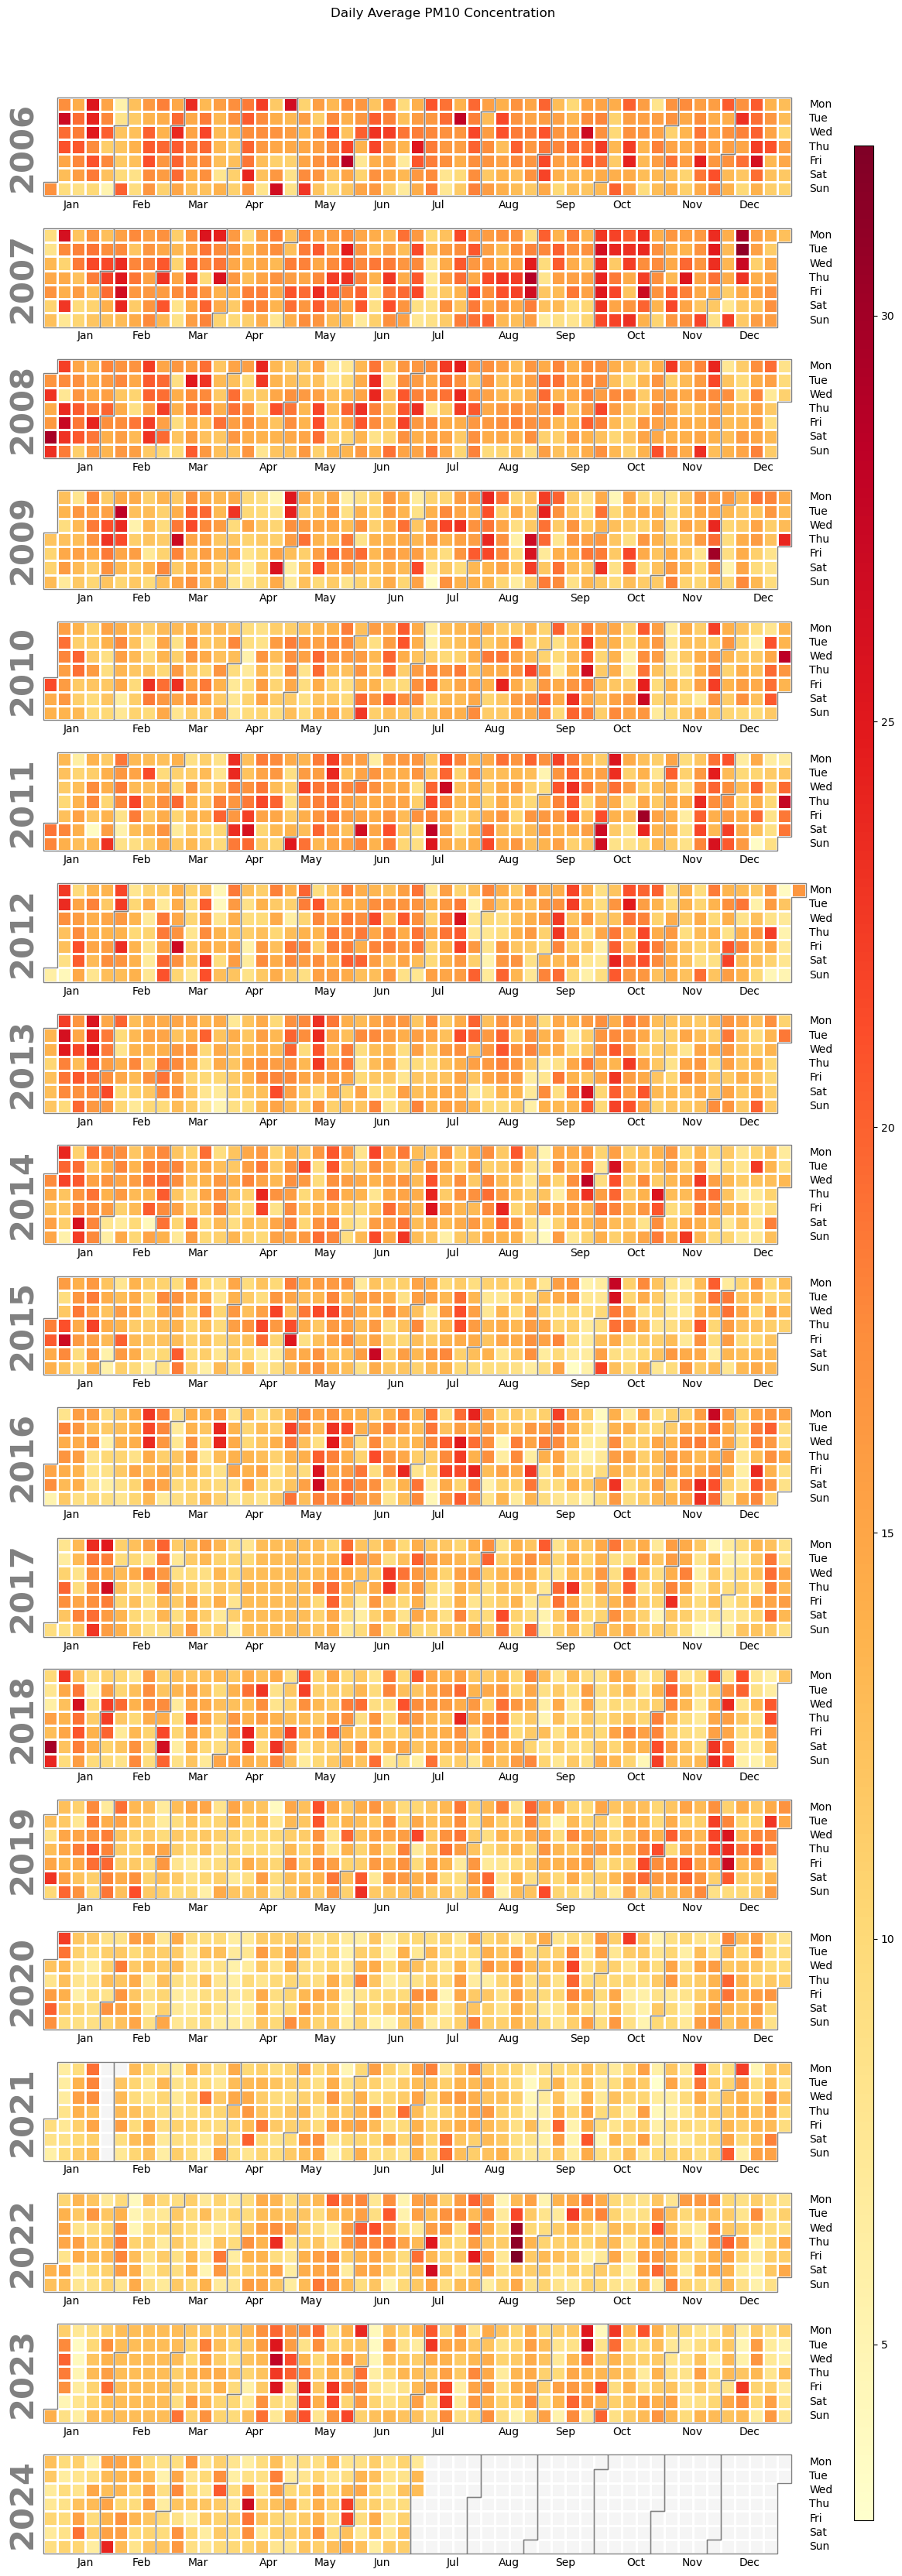

In [8]:
import pandas as pd
import calplot

# Assuming 'daily_mean' DataFrame is already defined and 'Date' has been converted to datetime
daily_mean['Date'] = pd.to_datetime(daily_mean['Date'])
daily_mean.set_index('Date', inplace=True)  # Set 'Date' as the index

# Now you can use calplot with the index having a year attribute
calplot.calplot(daily_mean['Value'], how='mean', cmap='YlOrRd', suptitle='Daily Average PM10 Concentration')



In [28]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a 'Month_Day' column for filtering by same date across years
df['Month_Day'] = df['Timestamp'].dt.strftime('%m-%d')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("PM10 Data Visualization Across Years for a Specific Date"),
    dcc.Dropdown(
        id='date-picker',
        options=[{'label': date, 'value': date} for date in df['Month_Day'].unique()],
        value='04-02'  # Default value can be set to any valid date
    ),
    dcc.Graph(id='time-series-graph')
])

@app.callback(
    Output('time-series-graph', 'figure'),
    Input('date-picker', 'value')
)
def update_graph(selected_date):
    # Filter DataFrame by 'Month_Day' to get data for the selected date across all years
    filtered_df = df[df['Month_Day'] == selected_date]
    fig = px.line(filtered_df, x='Timestamp', y='Value', title=f'PM10 Levels on {selected_date} Across Years')
    fig.update_xaxes(title='Year')
    fig.update_yaxes(title='PM10 Concentration')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [25]:
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create 'Year' and 'Month_Day' columns
df['Year'] = df['Timestamp'].dt.year
df['Month_Day'] = df['Timestamp'].dt.strftime('%m-%d')

# Filter for a specific date, for example, April 27 (04-27)
specific_date_df = df[df['Month_Day'] == '04-27']

# Create a scatter plot
fig = px.scatter(specific_date_df, x='Year', y='Value',
                 title='PM10 Levels on April 27th Across Years',
                 labels={'Value': 'PM10 Concentration', 'Year': 'Year'},
                 hover_data=['Timestamp'])

# Customize dots
fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')), mode='markers')

# Show the figure
fig.show()


In [7]:
import pandas as pd
import calplot
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Prepare daily mean data for heatmap
daily_mean = df.resample('D', on='Timestamp').mean().reset_index()
daily_mean.set_index('Timestamp', inplace=True)  # Ensure 'Timestamp' is the datetime index

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive PM10 Data Visualization"),

    # Dropdown for selecting the type of visualization
    dcc.Dropdown(
        id='plot-type',
        options=[
            {'label': 'Time Series Plot', 'value': 'time_series'},
            {'label': 'Box Plot', 'value': 'box_plot'},
            {'label': 'Heatmap', 'value': 'heatmap'},
            {'label': 'Calendar Heatmap', 'value': 'calendar_heatmap'}  # New option for calendar heatmap
        ],
        value='time_series'
    ),

    # Graph to display the visualizations
    dcc.Graph(id='graph'),

    # Slider for selecting the year (used for time series and box plot)
    dcc.Slider(
        id='year-slider',
        min=df['Timestamp'].dt.year.min(),
        max=df['Timestamp'].dt.year.max(),
        value=df['Timestamp'].dt.year.min(),
        marks={str(year): str(year) for year in df['Timestamp'].dt.year.unique()},
        step=None
    )
])

# Callback to update graph based on selected visualization type and year
@app.callback(
    Output('graph', 'figure'),
    [Input('plot-type', 'value'), Input('year-slider', 'value')]
)
def update_figure(plot_type, selected_year):
    if plot_type in ['time_series', 'box_plot', 'heatmap']:
        filtered_df = df[df['Timestamp'].dt.year == selected_year]
    
    if plot_type == 'time_series':
        fig = px.line(filtered_df, x='Timestamp', y='Value', title='PM10 Time Series')
    elif plot_type == 'box_plot':
        fig = px.box(filtered_df, x=filtered_df['Timestamp'].dt.month, y='Value', title='Monthly PM10 Distribution')
    elif plot_type == 'heatmap':
        heatmap_data = filtered_df.pivot_table(index=filtered_df['Timestamp'].dt.hour, columns=filtered_df['Timestamp'].dt.day, values='Value', aggfunc='mean')
        fig = px.imshow(heatmap_data)
    elif plot_type == 'calendar_heatmap':
        fig = calplot.calplot(daily_mean['Value'], how='mean', cmap='YlOrRd', suptitle='Daily Average PM10 Concentration')[0]  # calplot returns a tuple (fig, axes)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [ ]:
import pandas as pd
import calplot
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming df is already loaded and cleaned
df['Date'] = df['Timestamp'].dt.date
daily_mean = df.groupby('Date')['Value'].mean()
daily_mean.index = pd.to_datetime(daily_mean.index)  # Ensuring the index is datetime

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Interactive PM10 Data Visualization"),
    dcc.Graph(id='calendar-heatmap'),
])

# Callback to update the calendar heatmap
@app.callback(
    Output('calendar-heatmap', 'figure'),
    Input('calendar-heatmap', 'value')  # This could be adjusted based on actual input requirements
)
def update_calendar_heatmap(selected_year):
    # You can filter by year if needed, or adjust logic here
    fig, ax = calplot.calplot(daily_mean, how='mean', cmap='YlOrRd', suptitle='Daily Average PM10 Concentration')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a 'Month_Day' column for filtering by same date across years
df['Month_Day'] = df['Timestamp'].dt.strftime('%m-%d')

# Initialize the Dash app
app = Dash(__name__)

app.layout = html.Div([
    html.H1("PM10 Data Visualization Across Years for a Specific Date"),
    dcc.Dropdown(
        id='date-picker',
        options=[{'label': date, 'value': date} for date in df['Month_Day'].unique()],
        value='04-02'  # Default value can be set to any valid date
    ),
    dcc.Graph(id='time-series-graph')
])

@app.callback(
    Output('time-series-graph', 'figure'),
    Input('date-picker', 'value')
)
def update_graph(selected_date):
    # Filter DataFrame by 'Month_Day' to get data for the selected date across all years
    filtered_df = df[df['Month_Day'] == selected_date]
    fig = px.line(filtered_df, x='Timestamp', y='Value', title=f'PM10 Levels on {selected_date} Across Years')
    fig.update_xaxes(title='Year')
    fig.update_yaxes(title='PM10 Concentration')
    return fig




In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
df = pd.read_csv('cleaned_median_val_pm10_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values('Timestamp', inplace=True)

# Calculate rolling averages for smoothing
df['7_day_avg'] = df['Value'].rolling(window=7, center=True).mean()
df['30_day_avg'] = df['Value'].rolling(window=30, center=True).mean()

# Create the plot
fig = go.Figure()

# Add traces for raw data, 7-day average, and 30-day average
fig.add_trace(go.Scatter(x=df['Timestamp'], y=df['Value'], mode='lines', name='Daily PM10',
                         line=dict(color='blue', width=1), opacity=0.6))
fig.add_trace(go.Scatter(x=df['Timestamp'], y=df['7_day_avg'], mode='lines', name='7-Day Average',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df['Timestamp'], y=df['30_day_avg'], mode='lines', name='30-Day Average',
                         line=dict(color='green', width=2)))

# Update layout for a better visual experience
fig.update_layout(title='Interactive Time Series Visualization of PM10 Data',
                  xaxis_title='Date',
                  yaxis_title='PM10 Concentration',
                  hovermode='x unified')

# Enhance layout with more customization
fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
        dict(count=1, label="1m", step="month", stepmode="backward"),
        dict(count=6, label="6m", step="month", stepmode="backward"),
        dict(step="all")
    ])
))

# Show the figure
fig.show()
